In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

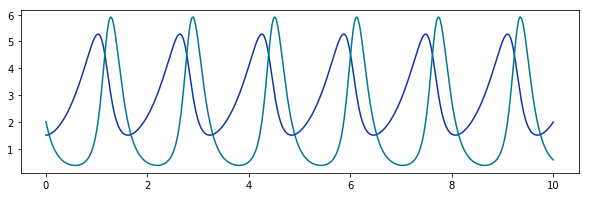

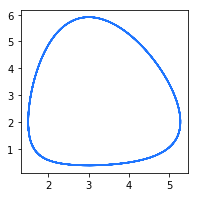

In [51]:
#predator prey example
def deriv(y,t):
    dydt0=2*y[0]-y[0]*y[1]
    dydt1=-9*y[1]+3*y[0]*y[1]
    return [dydt0,dydt1]

yini=[1.5,2.]
xini=0
xmax=10
n=10**4
t=np.linspace(xini,xmax,n)
y=odeint(deriv,yini,t)

u=y[:,0] 
v=y[:,1]


fig=plt.figure(1,figsize=(10,3))
    
plt.plot(t,u,'#1034A6')
plt.plot(t,v,'#007791')

fig=plt.figure(2,figsize=(3,3))


plt.plot(u,v,'#1F75FE')

<a list of 6 text.Text objects>

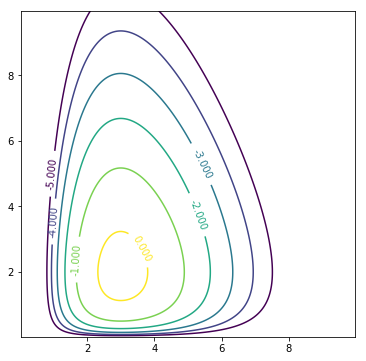

In [9]:
# constant E
x=np.arange(0.02,10,0.02)
y=np.arange(0.02,10,0.02)
U,V=np.meshgrid(x,y)
E=9*np.log(U)+2*np.log(V)-3*U-V
fig=plt.figure(1,figsize=(6,6))
CS=plt.contour(U,V,E,[-5,-4,-3,-2,-1,0])
plt.clabel(CS,inline=1,fontsize=10)

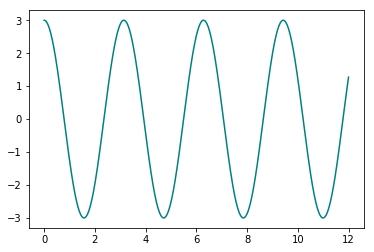

In [24]:
#example 1
from scipy.integrate import odeint
def deriv(y,t):
    dydt0=y[1]
    dydt1=-4*y[0]
    return np.array([dydt0,dydt1])
yini=np.array([3,0])
xini=0
xmax=12
n=1200
t=np.linspace(xini,xmax,n)
y=odeint(deriv,yini,t)
plt.plot(t,y[:,0],'teal')

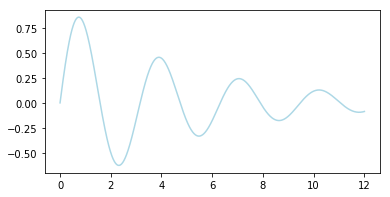

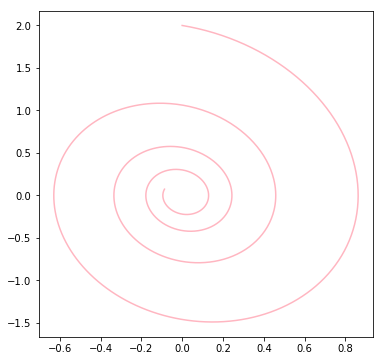

In [23]:
#example2
def deriv(y,t,g,w):
    dydt0=y[1]
    dydt1=-g*y[1]-w*w*y[0]
    return [dydt0,dydt1]

g=0.4
w=2
yini=[0,2]
y=odeint(deriv,yini,t,args=(g,w))

xini=0
xmax=12
n=1200
t=np.linspace(xini,xmax,n)
fig=plt.figure(1,figsize=(6,3))
plt.plot(t,y[:,0],'lightblue')
fig=plt.figure(2,figsize=(6,6))
plt.plot(y[:,0],y[:,1],'lightpink')

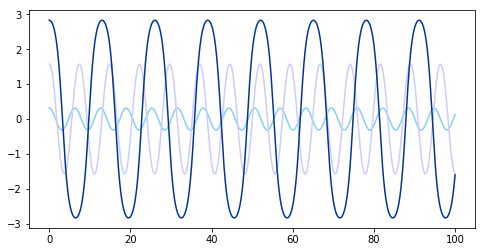

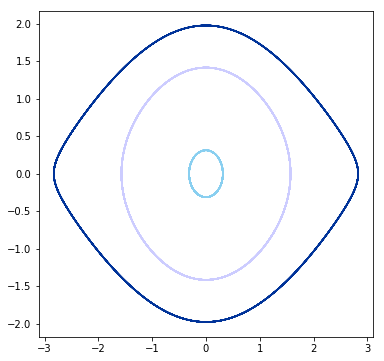

In [52]:
#example3
def deriv(y,t):
    dydt0=y[1]
    dydt1=-1*np.sin(y[0])
    return np.array([dydt0,dydt1])

yini=np.array([0.1*np.pi,0])
xini=0
xmax=100
n=10**5
t=np.linspace(xini,xmax,n)
y=odeint(deriv,yini,t)

fig=plt.figure(1,figsize=(8,4))
plt.plot(t,y[:,0],'#89CFF0')
fig=plt.figure(2,figsize=(6,6))
plt.plot(y[:,0],y[:,1],'#89CFF0')

yini=np.array([0.5*np.pi,0])
xini=0
xmax=100
n=10**5
t=np.linspace(xini,xmax,n)
y=odeint(deriv,yini,t)

fig=plt.figure(1,figsize=(8,4))
plt.plot(t,y[:,0],'#CCCCFF')
fig=plt.figure(2,figsize=(6,6))
plt.plot(y[:,0],y[:,1],'#CCCCFF')

yini=np.array([0.9*np.pi,0])
xini=0
xmax=100
n=10**5
t=np.linspace(xini,xmax,n)
y=odeint(deriv,yini,t)
fig=plt.figure(1,figsize=(8,4))
plt.plot(t,y[:,0],'#003399')
fig=plt.figure(2,figsize=(5,5))
plt.plot(y[:,0],y[:,1],'#003399')


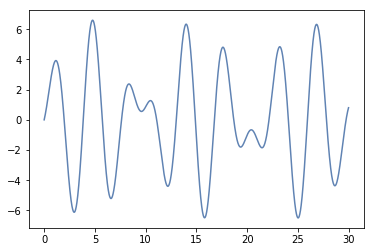

In [4]:
#example1-revisited, leapfrog

def func(y):
    return -4*y

tini,tmax=0,3000
yini=3
vini=0
h=0.01

t=tini
y=yini
v=yini+0.5*h*func(y)
E=[0]
T=[tini]
for i in range(3000):
    y+=v*h
    t+=h
    v+=0.5*h*func(y)
    err=y-3*np.cos(2*t)
    E=np.append(E,err)
    T=np.append(T,t)
    
plt.plot(T,E,color='#6083b3')

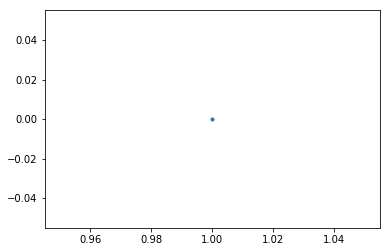

In [15]:
#exercise2-not completed 여기서부터 꼭꼭꼭 풀어보기 으ㅜ흐긓긓그휴ㅠㅠㅠ

def accel(x,y):
    r2=x*x+y*y
    f0=-x/r2
    f1=-y/r2
    return [f0, f1]

tmax=12
h=0.01
x,y=1,0
vx,vy=0,1
f=accel(x,y)
vx+=0.5*h*f[0]
vy+=0.5*h*f[1]
t+=h
L=[0]
T=[0]
X,Y=[x],[y]
while (t<=tmax):
    x+=h*vx
    y+=h*vy
    
    t+=0.5*h
    f=accel(x,y)
    vhx+=0.5*h*f[0]
    vhy+=0.5*h*f[1]
    
    vx+=0.5*h*f[0]
    vy+=0.5*h*f[1]
    t+=0.5*h
    X=np.append(X,x)
    Y=np.append(Y,y)
    T=np.append(T,t)
    L=np.append(L,x*vy-y*vx)
plt.plot(X,Y,'.')

In [17]:
#BVP example1-rocket
a1,a2=40,50
b1=40*5-0.5*9.8*25
b2=50*5-0.5*9.8*25
anew=a2+(a2-a1)*(40-b2)/(b2-b1)
print(anew)

32.5


In [ ]:
#BVP example2 - not completed yet 꼭 풀어보기 그리고 이거랑 다음 두 문제도 으흐그흑흐그흐긓ㄱ
from scipy.integrate import odeint
    
tol=pow(10,-6)
a1,a2=0,1
b2=0
bsol=43/3

def deriv(y,t):
    dydt0=y[1]
    dydt1=(1/8)*(32+2*(t**3)-y[0]*y[1])
    return np.array([dydt0,dydt1])

err=100
loop=-1
while(np.abs(err)>tol):
    loop+=1
    if loop==0 :
        yp=a1
    if loop==1:
        yp=a2

    yini=[17,0]
    xini=1
    xmax=3
    n=200
    t=np.linspace(xini,xmax,n)
    y=odeint(deriv,yini,t)
    
    b1=b2
    b2=y[n-1,0]
   
    if loop >= 1:
        err=bsol-b2
        yp=a2+(a2-a1)*(bsol-b2)/(b2-b1)
        a1=a2
        a2=yp
        

/Users/sehalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/Users/sehalee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
#eigenvalue problem example 1 



In [1]:
#eigenvalue problem example 2



In [1]:
#다음 시간에 아이겐밸류로 쪽지시험 20분간, 작성한 코드 참고 가능

혼자 하는 복습

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_bvp

In [12]:
  
tol=pow(10,-6)
a1,a2=0,1
b2=0
bsol=43/3

def func(y,t):
    dydt0=y[1]
    dydt1=(1/8)*(32+2*(t**3)-y[0]*y[1])
    return np.array([dydt0,dydt1])

def rk4(x,y,h):
    v1=func(x,y)
    v2=func(x+0.5*h,y+0.5*h*v1)
    v3=func(x+0.5*h,y+0.5*h*v2)
    v4=func(x+h,y+h*v3)
    return y+(h/6.)*(v1+2*v2+2*v3+v4)

err=100
loop=-1
while(np.abs(err)>tol):
    loop+=1
    if loop==0 :
        yp=a1
    if loop==1:
        yp=a2
     
    N=100
    h=(3-1)/N
    x=1
    y=[17,0]
    t=[x]
    u=[y[0]]
    v=[y[1]]
    
    
    for i in range(0,N):
        y=rk4(x,y,h)
        x+=h
        u=np.append(u,y[0])
        v=np.append(v,y[1])
        t=np.append(t,x)
    
    b1=b2
    b2=y[n-1,0]
   
    if loop >= 1:
        err=bsol-b2
        yp=a2+(a2-a1)*(bsol-b2)/(b2-b1)
        a1=a2
        a2=yp
        

TypeError: 'int' object is not subscriptable

In [35]:

def func(y,t):
    dydt0=y[1]
    dydt1=(1/8)*(32+2*(t**3)-y[0]*y[1])
    return np.array([dydt0,dydt1])

def bc(y):
    return np.array([])

res_a = solve_bvp(func, bc, x, y)

x = np.linspace(1,3,100)
y = [[17],[0]]


ValueError: `y` must be 2 dimensional.

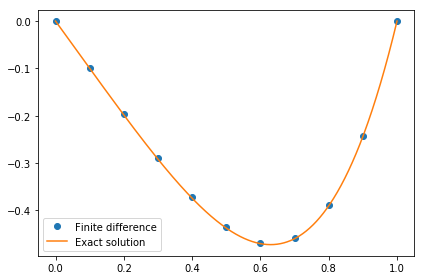

In [21]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt


J = 10
dx = 1.0/J
x = np.linspace(0, 1, J+1).transpose()

b = np.zeros((J+1, 1)).ravel()
b[1:J] = 12*dx**2*(x[1:J]**2)

main_diag = -2*np.ones((J+1, 1)).ravel()
off_diag = 1*np.ones((J, 1)).ravel()

a = main_diag.shape[0]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0, 0] = 1
A[0, 1] = 0
A[J, J] = 1
A[J, J-1] = 0

y = np.linalg.solve(A,b)

xf = np.linspace(0,1,1001)
yexact = xf**4 - xf

plt.plot(x, y, 'o')
plt.plot(xf, yexact)
plt.legend(['Finite difference', 'Exact solution'])
plt.tight_layout()
plt.show()